In [17]:
import requests
user = "startupfairy"
server = "sprotasov.ru"
port = 12345
url = "http://{0}:{1}/{2}".format(server, port, user)
raw = requests.get(url).text
lines = raw.strip().split('\n')
# include common oop model
%run kidoop.py
events = [Item(line) for line in lines]
print(events[:2], "...", events[-3:])

[@2018-02-26 23:23:54 случилось mom_food с аргументами ['Какаушка'], @2018-02-26 23:29:42 случилось sleep с аргументами []] ... [@2018-03-08 14:37:25 случилось child_weight с аргументами ['3240'], @2018-03-08 17:02:31 случилось mom_food с аргументами ['Курага, яблоко'], @2018-03-09 09:29:21 случилось child_weight с аргументами ['3260']]


In [18]:
import datetime as dt
start = dt.datetime(2018, 3, 6)
# print(start, start.timestamp())
sleeps = Item.consequense_in_range(events, 'sleep', 'wakeup', time_hours=4)
# recent
sleeps = [s for s in sleeps if s[0].ts > start.timestamp()]
print(sleeps)

[(@2018-03-06 00:02:38 случилось sleep с аргументами [], None), (@2018-03-06 10:36:13 случилось sleep с аргументами [], None), (@2018-03-06 14:29:50 случилось sleep с аргументами [], None), (@2018-03-07 14:37:35 случилось sleep с аргументами [], None), (@2018-03-07 17:54:00 случилось sleep с аргументами [], None), (@2018-03-07 19:55:26 случилось sleep с аргументами [], None)]


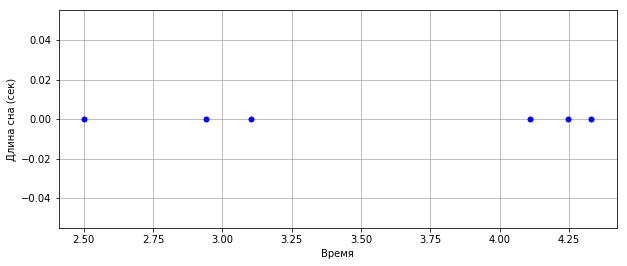

In [20]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,4))
vals = [p[0].days_from(dt.datetime(2018, 3, 3, 12))  for p in sleeps]
times = [p[0].time_to(p[1]) for p in sleeps]
plt.plot(vals, times, 'bo', markersize=5)
plt.grid(True)
plt.xlabel('Время')
plt.ylabel('Длина сна (сек)')
plt.show()